## Data processing, question 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
file_path = r'C:\Users\Asus\Desktop\Python для аналізу даних\тестове acted\Annex_1.csv'
df = pd.read_csv(file_path, encoding='latin1')

In [3]:
print(df.head())

    InterviewID data_collection_round Marital status - Head of Household  \
0     baseline1              Baseline                            Widowed   
1    baseline10              Baseline                            Married   
2   baseline100              Baseline                            Married   
3  baseline1000              Baseline                            Married   
4  baseline1001              Baseline                            Married   

  single_headed_household  Number household member boy under5 years old  \
0                     Yes                                             1   
1                      No                                             0   
2                      No                                             0   
3                      No                                             0   
4                      No                                             0   

   Number household member _girl_under5 years old  \
0                                      

In [4]:
# List of questions from Table 2
table_2_questions = [
    'Mentionedafterdefecating',
    'Mentionedbeforeeating',
    'Mentionedbeforeeatingafterdefecating',
    'Mentionedbeforefeedingchild',
    'Mentionedbeforemedicating',
    'Mentionedaftermadicating'
]

# Filter the DataFrame to include only the relevant questions
relevant_data = df[table_2_questions]

# Compare answers with 'No' to get True/False values
result_df = relevant_data.eq('No')

# Count the number of 'No' answers for each household
num_unsanitary = result_df.sum(axis=1)

# Classify households as 'Sanitary' or 'Unsanitary'
df['sanitation_habit'] = 'Sanitary'
df.loc[num_unsanitary > 2, 'sanitation_habit'] = 'Unsanitary'

# Example usage:
print(df[['InterviewID', 'sanitation_habit']])


                                    InterviewID sanitation_habit
0                                     baseline1         Sanitary
1                                    baseline10         Sanitary
2                                   baseline100       Unsanitary
3                                  baseline1000         Sanitary
4                                  baseline1001         Sanitary
...                                         ...              ...
4814  uuid:ff010b8d-5291-41b1-9db5-77e3fc66f7fa         Sanitary
4815  uuid:ff2a3a6d-2332-4888-acff-468aa87f649f         Sanitary
4816  uuid:ff38ffa1-27da-414c-b908-a50afebf98b0         Sanitary
4817  uuid:ff773cc5-f95c-4797-b485-81488e515b7d       Unsanitary
4818  uuid:ffd4a47d-c096-494d-b166-db98d4e87446         Sanitary

[4819 rows x 2 columns]


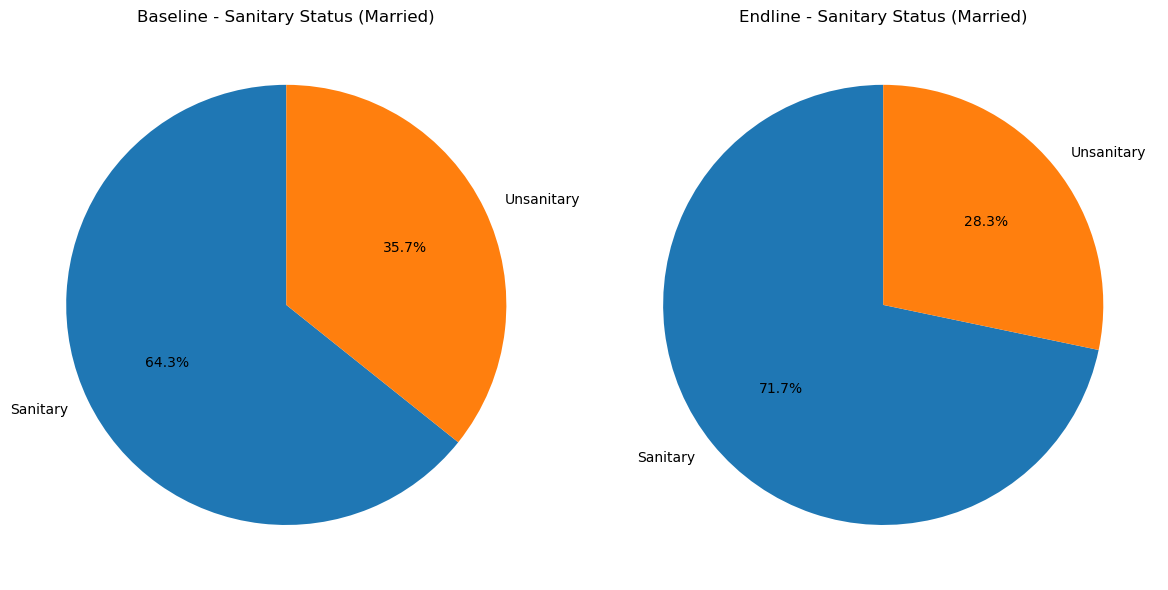

In [5]:
# Filter data for married households
married_baseline_data = df[(df['data_collection_round'] == 'Baseline') & (df['Marital status - Head of Household'] == 'Married')]
married_endline_data = df[(df['data_collection_round'] == 'End-line') & (df['Marital status - Head of Household'] == 'Married')]

# Calculate percentages of 'Sanitary' and 'Unsanitary' households for baseline and endline rounds
baseline_sanitary_percentages = married_baseline_data['sanitation_habit'].value_counts(normalize=True) * 100
endline_sanitary_percentages = married_endline_data['sanitation_habit'].value_counts(normalize=True) * 100

# Plot baseline data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(baseline_sanitary_percentages, labels=baseline_sanitary_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Baseline - Sanitary Status (Married)')

# Plot endline data
plt.subplot(1, 2, 2)
plt.pie(endline_sanitary_percentages, labels=endline_sanitary_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Endline - Sanitary Status (Married)')

plt.tight_layout()
plt.show()


Conclusion: The percentage of married households with "Sanitary" status increased from the baseline to the endline round. This indicates an improvement in sanitation habits among married households after the implementation of the water improvement project.

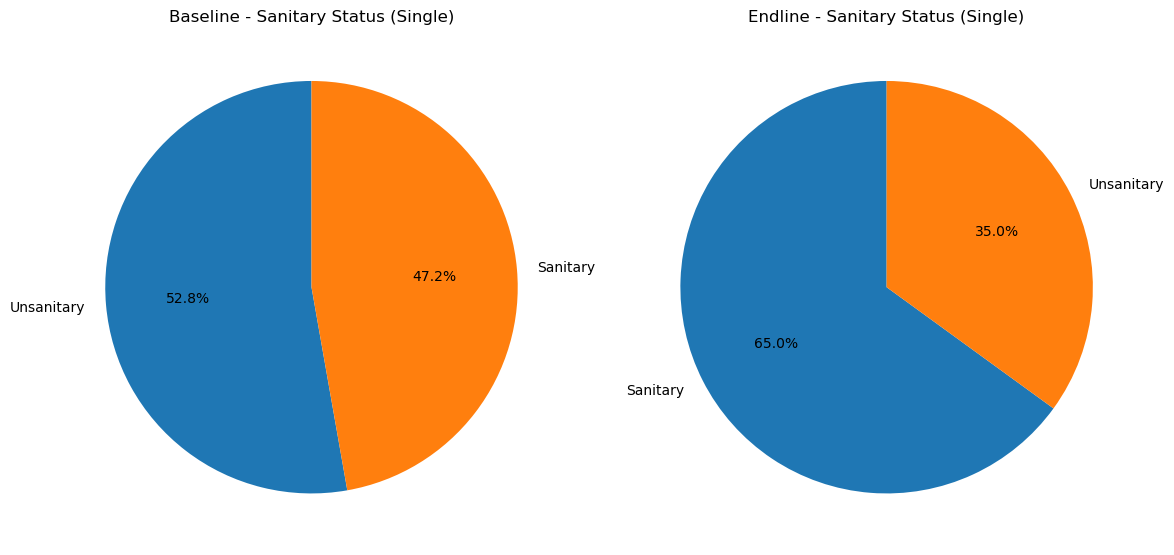

In [6]:
# Filter data for single households
single_baseline_data = df[(df['data_collection_round'] == 'Baseline') & (df['Marital status - Head of Household'] == 'Single')]
single_endline_data = df[(df['data_collection_round'] == 'End-line') & (df['Marital status - Head of Household'] == 'Single')]

# Calculate percentages of 'Sanitary' and 'Unsanitary' households for baseline and endline rounds
baseline_sanitary_percentages = single_baseline_data['sanitation_habit'].value_counts(normalize=True) * 100
endline_sanitary_percentages = single_endline_data['sanitation_habit'].value_counts(normalize=True) * 100

# Plot baseline data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(baseline_sanitary_percentages, labels=baseline_sanitary_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Baseline - Sanitary Status (Single)')

# Plot endline data
plt.subplot(1, 2, 2)
plt.pie(endline_sanitary_percentages, labels=endline_sanitary_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Endline - Sanitary Status (Single)')

plt.tight_layout()
plt.show()


Conclusion: the percentage of single households with "Sanitary" status increased and the percentage with "Unsanitary" status decreased from the baseline to the endline round, it would suggest an improvement in sanitation practices among single households following the implementation of the water improvement project.

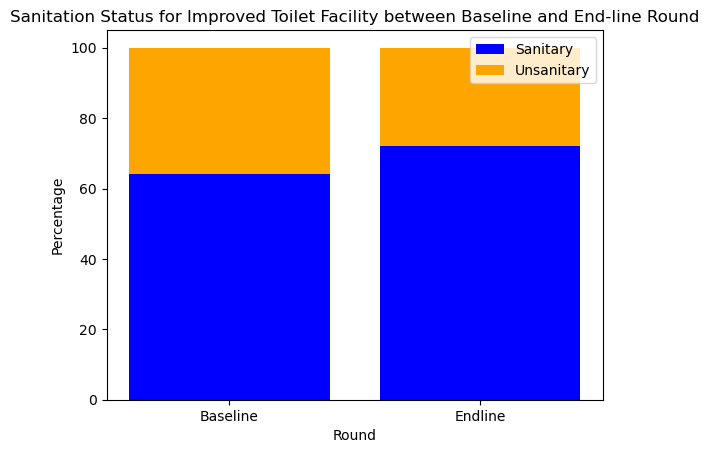

In [7]:
# Filter data for households with improved toilet facilities
improved_toilet_facility_df = df[df['Improvedsanitationfacility'] == 'Improved toilet facility']

# Filter data for baseline and end-line rounds
baseline_improved_facility = improved_toilet_facility_df[improved_toilet_facility_df['data_collection_round'] == 'Baseline']
endline_improved_facility = improved_toilet_facility_df[improved_toilet_facility_df['data_collection_round'] == 'End-line']

# Calculate proportions of "Sanitary" and "Unsanitary" sanitation habits for baseline and end-line rounds
baseline_proportions = baseline_improved_facility['sanitation_habit'].value_counts(normalize=True) * 100
endline_proportions = endline_improved_facility['sanitation_habit'].value_counts(normalize=True) * 100

# Plot the results
labels = ['Baseline', 'Endline']
sanitary_proportions = [baseline_proportions.get('Sanitary', 0), endline_proportions.get('Sanitary', 0)]
unsanitary_proportions = [baseline_proportions.get('Unsanitary', 0), endline_proportions.get('Unsanitary', 0)]

x = range(len(labels))

plt.bar(x, sanitary_proportions, color='blue', label='Sanitary')
plt.bar(x, unsanitary_proportions, color='orange', bottom=sanitary_proportions, label='Unsanitary')

plt.xlabel('Round')
plt.ylabel('Percentage')
plt.title('Sanitation Status for Improved Toilet Facility between Baseline and End-line Round')
plt.xticks(x, labels)
plt.legend()
plt.show()


Conclusion: based on the diagram we can see that improved toilet facility has increased sanitary level for households.